## Cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import re

In [3]:
biz = pd.read_csv('businesses_mtl.csv')
biz

,id,name,url,review_count,categories,rating,latitude,longitude,price,location,phone
0,0W4lkclzZThpx3V65bVgig,Schwartz's,https://www.yelp.com/biz/schwartzs-montr%C3%A9...,2697,"['delis', 'sandwiches']",4.0,45.516353,-73.577642,$$,"['3895 Boulevard Saint-Laurent', 'Montreal, QC...",1.514842e+10
1,EpAXhhvS-8U9aG2LlAr5WA,Le Majestique,https://www.yelp.com/biz/le-majestique-montr%C...,167,"['bars', 'newcanadian']",4.5,45.517544,-73.580262,$$,"['4105 Boulevard Saint-Laurent', 'Montreal, QC...",1.514439e+10
2,yU3p0tEBtGuZLTcsBHw9uQ,Le Passé Composé,https://www.yelp.com/biz/le-pass%C3%A9-compos%...,311,"['breakfast_brunch', 'bistros']",4.5,45.520079,-73.556603,$$,"['1310 Boulevard de Maisonneuve E', 'Montreal,...",1.514525e+10
3,K7szuaFnuV6nz4w_i-bLPg,Ma Poule Mouillée,https://www.yelp.com/biz/ma-poule-mouill%C3%A9...,473,"['portuguese', 'chickenshop']",4.5,45.525219,-73.575069,$$,"['969 Rue Rachel Est', 'Montreal, QC H2J 2J4',...",1.514523e+10
4,wzugmCevnXuCMCF4upAf0w,Kazu,https://www.yelp.com/biz/kazu-montr%C3%A9al-2,661,['japanese'],4.5,45.492867,-73.580078,$$,"['1844 Rue Sainte-Catherine O', 'Montreal, QC ...",1.514937e+10
...,...,...,...,...,...,...,...,...,...,...,...
995,ZwWiPJYA-hk6jtBo9yKIPw,Parasol,https://www.yelp.com/biz/parasol-montr%C3%A9al,3,"['wine_bars', 'newcanadian']",4.5,45.525360,-73.597550,NaN,"['5439 Boulevard Saint-Laurent', 'Montreal, QC...",NaN
996,pLkm9ulFCnTYqcKjvx_4jw,Sandwicherie Ka'ek,https://www.yelp.com/biz/sandwicherie-kaek-mon...,9,"['sandwiches', 'lebanese']",4.0,45.496520,-73.579100,NaN,"['2002 Rue Mackay', 'Montreal, QC H3G 2J1', 'C...",1.514936e+10
997,vDr86AduKSK-APSvuQkRxQ,Lapop,https://www.yelp.com/biz/lapop-montr%C3%A9al,18,['waffles'],4.5,45.503130,-73.556540,NaN,"['436 Rue Saint-François-Xavier', 'Montreal, Q...",1.514780e+10
998,tp8ghaYF8HVVg5dhO43HvQ,Bistro Chez Roger,https://www.yelp.com/biz/bistro-chez-roger-mon...,12,['french'],4.0,45.547420,-73.592690,$$$,"['2316 Rue Beaubien E', 'Montreal, QC H2G 1M9'...",1.514593e+10


In [2]:
#os.listdir('data/')
def files(path):
    for file in os.listdir(path):
        if os.path.isfile(os.path.join(path, file)):
            yield file

for file in files("."):
    print (file)

In [5]:
df = pd.DataFrame()
path = 'data/'

# Reassemble csv files into a dataframe
for i in range(1,1001):
    try:
        revs = pd.read_csv(path + str(i) + '_biz_reviews.csv')
        revs['biz_id'] = biz['id'].iloc[i - 1]
        df = pd.concat([df, revs])
    except:
        None

In [6]:
df

,user_url,user_name,user_city,user_rating,user_review,biz_id
0,/user_details?userid=lxGwbMkC_I9D7GhGT23mFQ,Cynthia L.,"Ville-Marie, Montreal, Canada",5 star rating,Went here pre-covid with my bf and best friend...,0W4lkclzZThpx3V65bVgig
1,/user_details?userid=IMHvG_ysz6akYIM-GO18kg,Andrea D.,"Le Plateau-Mont-Royal, Montreal, Canada",5 star rating,*home delivery review* Amazing. Literally tast...,0W4lkclzZThpx3V65bVgig
2,/user_details?userid=DlNz5SxdBYRaZ_pnyIxn6g,Rhonda B.,"Montreal, Canada",5 star rating,I must add a disclaimer to this review since I...,0W4lkclzZThpx3V65bVgig
3,/user_details?userid=gAvuqk1q2uAo2BJzZDLmDQ,Matt M.,"Oklahoma City, OK",5 star rating,One of my favorite Quebecois institutions!No t...,0W4lkclzZThpx3V65bVgig
4,/user_details?userid=3VLcNOmumPkwuSoQxTBHTw,Marc I.,"Ajax, Canada",5 star rating,Is there anything better that a true Smoked me...,0W4lkclzZThpx3V65bVgig
...,...,...,...,...,...,...
62,/user_details?userid=XEsPq0Kd7Uxq4Guv0Dj6Wg,Nicole R.,"Montreal, Canada",2 star rating,Such a disappointing experience!! Went to Raso...,pJrM4yAZo0Gs63D9UCyCSQ
63,/user_details?userid=S_sIeCOqy7F4RFs0le1cDQ,Joel S.,"Los Angeles, CA",5 star rating,"Delicious food, tasty cocktails, reasonably pr...",pJrM4yAZo0Gs63D9UCyCSQ
64,/user_details?userid=tEZsTQEkZSK0RMjYZoZzZA,Hani A.,"Le Sud-Ouest, Canada",3 star rating,"rating for new terrace, too much noise coming ...",pJrM4yAZo0Gs63D9UCyCSQ
65,/user_details?userid=z5xzL1Zl5iiHLuOqn07CLg,E T.,"Ottawa, Canada",5 star rating,Staff were friendly and helpful. The food was ...,pJrM4yAZo0Gs63D9UCyCSQ


In [9]:
df = df.dropna()
df['user_rating'] = df['user_rating'].astype('str').str.slice(0,1).astype('int')

In [3]:
#df.to_csv('yelp_reviews_mtl.csv', index=False)
df = pd.read_csv('yelp_reviews_mtl.csv')
df

,user_url,user_name,user_city,user_rating,user_review,biz_id
0,/user_details?userid=lxGwbMkC_I9D7GhGT23mFQ,Cynthia L.,"Ville-Marie, Montreal, Canada",5,Went here pre-covid with my bf and best friend...,0W4lkclzZThpx3V65bVgig
1,/user_details?userid=IMHvG_ysz6akYIM-GO18kg,Andrea D.,"Le Plateau-Mont-Royal, Montreal, Canada",5,*home delivery review* Amazing. Literally tast...,0W4lkclzZThpx3V65bVgig
2,/user_details?userid=DlNz5SxdBYRaZ_pnyIxn6g,Rhonda B.,"Montreal, Canada",5,I must add a disclaimer to this review since I...,0W4lkclzZThpx3V65bVgig
3,/user_details?userid=gAvuqk1q2uAo2BJzZDLmDQ,Matt M.,"Oklahoma City, OK",5,One of my favorite Quebecois institutions!No t...,0W4lkclzZThpx3V65bVgig
4,/user_details?userid=3VLcNOmumPkwuSoQxTBHTw,Marc I.,"Ajax, Canada",5,Is there anything better that a true Smoked me...,0W4lkclzZThpx3V65bVgig
...,...,...,...,...,...,...
64862,/user_details?userid=XEsPq0Kd7Uxq4Guv0Dj6Wg,Nicole R.,"Montreal, Canada",2,Such a disappointing experience!! Went to Raso...,pJrM4yAZo0Gs63D9UCyCSQ
64863,/user_details?userid=S_sIeCOqy7F4RFs0le1cDQ,Joel S.,"Los Angeles, CA",5,"Delicious food, tasty cocktails, reasonably pr...",pJrM4yAZo0Gs63D9UCyCSQ
64864,/user_details?userid=tEZsTQEkZSK0RMjYZoZzZA,Hani A.,"Le Sud-Ouest, Canada",3,"rating for new terrace, too much noise coming ...",pJrM4yAZo0Gs63D9UCyCSQ
64865,/user_details?userid=z5xzL1Zl5iiHLuOqn07CLg,E T.,"Ottawa, Canada",5,Staff were friendly and helpful. The food was ...,pJrM4yAZo0Gs63D9UCyCSQ


In [10]:
#can = df2[df2.user_city.str.contains('Canada', na=False)]
#mtl = df2[df2.user_city.str.contains('Montreal|Laval|Longueuil', na=False)]

In [12]:
print(df.biz_id.value_counts(sort=True, ascending=False).mean())
df.biz_id.value_counts(sort=True, ascending=False)

65.65485829959515


0W4lkclzZThpx3V65bVgig    2580
5T6kFKFycym_GkhgOiysIw    1764
46Ld9Qc9nAx_A0jwclNZiw    1325
cKdox2gt3L1Dbb7MpOPdWg    1238
J6qWt6XIUmIGFHX5rQJA-w    1063
                          ... 
HRvuIWsjuYK6ZptATC2O1A       1
hfnVT9xNocpSsOTr9OZCbg       1
7k-UFXb8c5bDSHXsOMB7lw       1
btVKpCpwXcOeLZNY31Tj1A       1
9ikshY1-dW4e_8IRbKJBxg       1
Name: biz_id, Length: 988, dtype: int64

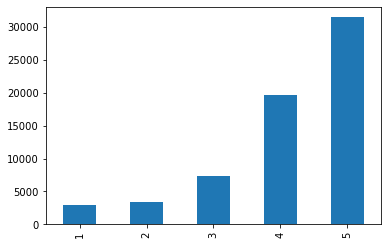

In [14]:
df.user_rating.value_counts().plot(kind='bar');

In [16]:
import string 
from sklearn.feature_extraction import text
reviews = df.user_review
reviews = reviews.str.lower().str.replace('[{}]'.format(string.punctuation),'')

<ipython-input-16-868c2015f537>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews = reviews.str.lower().str.replace('[{}]'.format(string.punctuation),'')


559.9503907996361

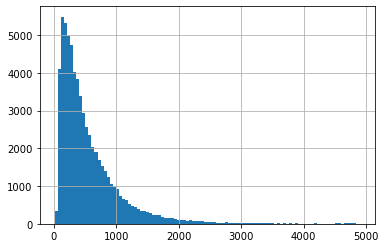

In [17]:
# average character length of reviews
reviews.str.len().hist(bins=100);
reviews.str.len().mean()

In [19]:
# neglectable number of short reviews 
df.user_review[df.user_review.str.len() <= 50].count()

86